<a href="https://colab.research.google.com/github/Ezzeldin-nasser939/Active_Learn/blob/main/Active_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Imports***

In [ ]:
!git clone https://github.com/modAL-python/modAL

fatal: destination path 'modAL' already exists and is not an empty directory.


In [ ]:
%cd /content/modAL
%pip install -qr rtd_requirements.txt

/content/modAL


In [ ]:
import numpy as np
import random
from sklearn import datasets
import matplotlib.pyplot as plt
from keras.datasets import mnist ,fashion_mnist
from modAL.models import ActiveLearner
from modAL.uncertainty import entropy_sampling ,uncertainty_sampling ,margin_sampling
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# ***Balanced 3&9 Minist Data***

In [ ]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
three=[]
three_lable=[]
nine=[]
nine_lable=[]
for i in range(len(y_train)):
   if  y_train[i] == 3 :
       three.append(X_train[i])
       three_lable.append(y_train[i])
   if  y_train[i] == 9 :
       nine.append(X_train[i])
       nine_lable.append(y_train[i])

In [ ]:
x=np.concatenate((three,nine),axis=0)
y=np.concatenate((three_lable,nine_lable),axis=0)

In [ ]:
x.shape

(12080, 28, 28)

In [ ]:
y.shape

(12080,)

In [ ]:
s = list(zip(x, y))

random.shuffle(s)

x, y = zip(*s)

In [ ]:
x=np.array(x)
y=np.array(y)

In [ ]:
x = x.reshape((-1,784))
X_training=x[0:20]
y_training=y[0:20]
X_pool=x[20:-1]
y_pool=y[20:-1]

In [ ]:
X_training.shape

(20, 784)

In [ ]:
y_training.shape

(20,)

In [ ]:
learner_entropy_sampling = ActiveLearner(
estimator=RandomForestClassifier(n_estimators=100),
query_strategy=entropy_sampling,
X_training=X_training,
y_training=y_training,
)
print("entropy sampling")
scores_entropy_sampling = []
score = 0
n_queries = 20
for idx in range(n_queries):
    query_idx, query_instance = learner_entropy_sampling.query(X_pool)
    learner_entropy_sampling.teach (X=X_pool[query_idx] , y=y_pool[query_idx] )
    score = learner_entropy_sampling.score(x, y)
    scores_entropy_sampling.append(score)
    print('Query no. %d' % (idx + 1),"The Score",score)

entropy sampling
Query no. 1 The Score 0.8835264900662252
Query no. 2 The Score 0.9175496688741722
Query no. 3 The Score 0.9335264900662251
Query no. 4 The Score 0.9318708609271523
Query no. 5 The Score 0.9254139072847682
Query no. 6 The Score 0.9341887417218543
Query no. 7 The Score 0.9230960264900663
Query no. 8 The Score 0.9403145695364239
Query no. 9 The Score 0.957864238410596
Query no. 10 The Score 0.9456953642384106
Query no. 11 The Score 0.9576986754966887
Query no. 12 The Score 0.9519867549668874
Query no. 13 The Score 0.9564569536423841
Query no. 14 The Score 0.9595198675496689
Query no. 15 The Score 0.9611754966887417
Query no. 16 The Score 0.9618377483443709
Query no. 17 The Score 0.9689569536423841
Query no. 18 The Score 0.9604304635761589
Query no. 19 The Score 0.9706125827814569
Query no. 20 The Score 0.9601821192052981


In [ ]:
learner_uncertainty_sampling = ActiveLearner(
estimator=RandomForestClassifier(n_estimators=100),
query_strategy=uncertainty_sampling,
X_training=X_training,
y_training=y_training,
)
print("uncertainty sampling")
scores_uncertainty_sampling=[]
n_queries = 20
for idx in range(n_queries):
    query_idx, query_instance = learner_uncertainty_sampling.query(X_pool)
    learner_uncertainty_sampling.teach (X=X_pool[query_idx] , y=y_pool[query_idx] )
    score = learner_uncertainty_sampling.score(x, y)
    scores_uncertainty_sampling.append(score)
    print('Query no. %d' % (idx + 1),"The Score",score)

uncertainty sampling
Query no. 1 The Score 0.9184602649006622
Query no. 2 The Score 0.8964403973509933
Query no. 3 The Score 0.9064569536423841
Query no. 4 The Score 0.9139072847682119
Query no. 5 The Score 0.9436258278145695
Query no. 6 The Score 0.9375827814569536
Query no. 7 The Score 0.9520695364238411
Query no. 8 The Score 0.9550496688741722
Query no. 9 The Score 0.952317880794702
Query no. 10 The Score 0.9586920529801325
Query no. 11 The Score 0.9562913907284768
Query no. 12 The Score 0.9530629139072848
Query no. 13 The Score 0.9551324503311258
Query no. 14 The Score 0.9517384105960265
Query no. 15 The Score 0.9502483443708609
Query no. 16 The Score 0.9606788079470199
Query no. 17 The Score 0.9506622516556291
Query no. 18 The Score 0.9571192052980132
Query no. 19 The Score 0.9585264900662251
Query no. 20 The Score 0.9605132450331125


In [ ]:
learner_margin_sampling = ActiveLearner(
estimator=RandomForestClassifier(n_estimators=100),
query_strategy=margin_sampling,
X_training=X_training,
y_training=y_training,
)
print("margin sampling")
n_queries = 20
scores_margin_sampling=[]
for idx in range(n_queries):
    query_idx, query_instance = learner_margin_sampling.query(X_pool)
    learner_margin_sampling.teach (X=X_pool[query_idx] , y=y_pool[query_idx] )
    score = learner_margin_sampling.score(x, y)
    scores_margin_sampling.append(score)
    print('Query no. %d' % (idx + 1),"The Score",score)

margin sampling
Query no. 1 The Score 0.9291390728476822
Query no. 2 The Score 0.9317880794701987
Query no. 3 The Score 0.9331125827814569
Query no. 4 The Score 0.9233443708609271
Query no. 5 The Score 0.9361754966887417
Query no. 6 The Score 0.9258278145695364
Query no. 7 The Score 0.9336092715231789
Query no. 8 The Score 0.9343543046357616
Query no. 9 The Score 0.9452814569536424
Query no. 10 The Score 0.9303807947019868
Query no. 11 The Score 0.9481788079470199
Query no. 12 The Score 0.9556291390728476
Query no. 13 The Score 0.954635761589404
Query no. 14 The Score 0.9551324503311258
Query no. 15 The Score 0.9485099337748344
Query no. 16 The Score 0.9598509933774835
Query no. 17 The Score 0.9499172185430463
Query no. 18 The Score 0.9587748344370861
Query no. 19 The Score 0.9506622516556291
Query no. 20 The Score 0.9602649006622517


In [ ]:
def random_sampling(classifier, X_pool):
    n_samples = len(X_pool)
    query_idx = np.random.choice(range(n_samples))
    return [query_idx], X_pool[query_idx]

In [ ]:
learner_random_sampling = ActiveLearner(
    estimator=RandomForestClassifier(n_estimators=100),
    query_strategy=random_sampling,
    X_training=X_training, y_training=y_training
)
print("random sampling")
n_queries = 20
scores_random_sampling=[]
for idx in range(n_queries):
    query_idx, query_instance = learner_random_sampling.query(X_pool)
    learner_random_sampling.teach (X=X_pool[query_idx] , y=y_pool[query_idx] )
    score = learner_random_sampling.score(x, y)
    scores_random_sampling.append(score)
    print('Query no. %d' % (idx + 1),"The Score",score)

random sampling
Query no. 1 The Score 0.9091887417218543
Query no. 2 The Score 0.9004139072847682
Query no. 3 The Score 0.9147350993377483
Query no. 4 The Score 0.9187913907284768
Query no. 5 The Score 0.9278145695364238
Query no. 6 The Score 0.919205298013245
Query no. 7 The Score 0.9149006622516557
Query no. 8 The Score 0.925
Query no. 9 The Score 0.9325331125827815
Query no. 10 The Score 0.9355132450331126
Query no. 11 The Score 0.9364238410596026
Query no. 12 The Score 0.93658940397351
Query no. 13 The Score 0.937251655629139
Query no. 14 The Score 0.937251655629139
Query no. 15 The Score 0.9424668874172185
Query no. 16 The Score 0.9490066225165563
Query no. 17 The Score 0.9458609271523178
Query no. 18 The Score 0.9475993377483444
Query no. 19 The Score 0.9577814569536424
Query no. 20 The Score 0.9512417218543047


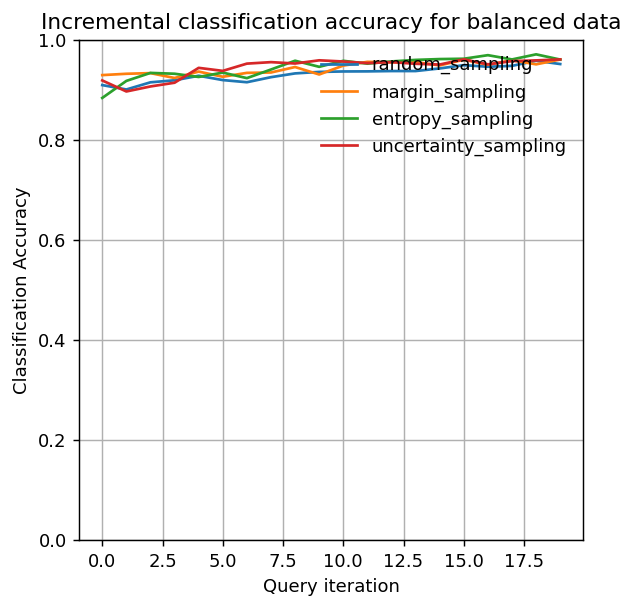

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=130)

ax.plot(scores_random_sampling, label='random_sampling')

ax.plot(scores_margin_sampling, label='margin_sampling')

ax.plot(scores_entropy_sampling, label='entropy_sampling')

ax.plot(scores_uncertainty_sampling, label='uncertainty_sampling')

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('Incremental classification accuracy for balanced data')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')
leg = ax.legend(loc='upper right', frameon=False);
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# evaluate the performance of the active learning models on the test set
y_pred_entropy = learner_entropy_sampling.predict(x)
acc_entropy = accuracy_score(y, y_pred_entropy)

y_pred_uncertainty = learner_uncertainty_sampling.predict(x)
acc_uncertainty = accuracy_score(y, y_pred_uncertainty)

y_pred_margin = learner_margin_sampling.predict(x)
acc_margin = accuracy_score(y, y_pred_margin)

y_pred_random = learner_random_sampling.predict(x)
acc_random = accuracy_score(y, y_pred_random)

# print the accuracy score for each model
print("Accuracy score uncertainty sampling = ",acc_uncertainty)
print("Accuracy score margin sampling = ",acc_margin)
print("Accuracy score entropy sampling = ",acc_entropy)
print("Accuracy score random sampling = ",acc_random)

Accuracy score uncertainty sampling =  0.9605132450331125
Accuracy score margin sampling =  0.9602649006622517
Accuracy score entropy sampling =  0.9601821192052981
Accuracy score random sampling =  0.9512417218543047


# **Unbalanced 0&8 Minist Data**

In [ ]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [ ]:
zero=[]
zero_lable=[]
zero_count=0
eight=[]
eight_lable=[]
eight_count=0
for i in range(len(y_train)):
   if  y_train[i] ==0 and zero_count<100:
       zero.append(X_train[i])
       zero_lable.append(y_train[i])
       zero_count+=1
   if  y_train[i] ==8 and eight_count<1000:
       eight.append(X_train[i])
       eight_lable.append(y_train[i])
       eight_count+=1

In [ ]:
x=np.concatenate((zero,eight),axis=0)
y=np.concatenate((zero_lable,eight_lable),axis=0)

In [ ]:
x = x.reshape((-1,784))
X_training=x[0:100]
y_training=y[0:100]
X_pool=x[100:-1]
y_pool=y[100:-1]


In [ ]:
learner_entropy_sampling = ActiveLearner(
estimator=RandomForestClassifier(n_estimators=100),
query_strategy=entropy_sampling,
X_training=X_training,
y_training=y_training,
)
print("entropy sampling")
score = 0
scores_entropy_sampling = []
n_queries = 20
for idx in range(n_queries):
    query_idx, query_instance = learner_entropy_sampling.query(X_pool)
    learner_entropy_sampling.teach (X=X_pool[query_idx] , y=y_pool[query_idx] )
    score = learner_entropy_sampling.score(X_pool, y_pool)
    scores_entropy_sampling.append(score)
    print('Query no. %d' % (idx + 1),"The Score",score)

entropy sampling
Query no. 1 The Score 0.001001001001001001
Query no. 2 The Score 0.12112112112112113
Query no. 3 The Score 0.3483483483483483
Query no. 4 The Score 0.5225225225225225
Query no. 5 The Score 0.7097097097097097
Query no. 6 The Score 0.7577577577577578
Query no. 7 The Score 0.7687687687687688
Query no. 8 The Score 0.8238238238238238
Query no. 9 The Score 0.8808808808808809
Query no. 10 The Score 0.8878878878878879
Query no. 11 The Score 0.8978978978978979
Query no. 12 The Score 0.9119119119119119
Query no. 13 The Score 0.9419419419419419
Query no. 14 The Score 0.9459459459459459
Query no. 15 The Score 0.9669669669669669
Query no. 16 The Score 0.95995995995996
Query no. 17 The Score 0.9769769769769769
Query no. 18 The Score 0.983983983983984
Query no. 19 The Score 0.983983983983984
Query no. 20 The Score 0.9819819819819819


In [ ]:
learner_uncertainty_sampling = ActiveLearner(
estimator=RandomForestClassifier(n_estimators=100),
query_strategy=uncertainty_sampling,
X_training=X_training,
y_training=y_training,
)
print("uncertainty sampling")
n_queries = 20
scores_uncertainty_sampling = []
for idx in range(n_queries):
    query_idx, query_instance = learner_uncertainty_sampling.query(X_pool)
    learner_uncertainty_sampling.teach (X=X_pool[query_idx] , y=y_pool[query_idx] )
    score = learner_uncertainty_sampling.score(x, y)
    scores_uncertainty_sampling.append(score)
    print('Query no. %d' % (idx + 1),"The Score",score)

uncertainty sampling
Query no. 1 The Score 0.11181818181818182
Query no. 2 The Score 0.16545454545454547
Query no. 3 The Score 0.36272727272727273
Query no. 4 The Score 0.5281818181818182
Query no. 5 The Score 0.6590909090909091
Query no. 6 The Score 0.7827272727272727
Query no. 7 The Score 0.84
Query no. 8 The Score 0.8618181818181818
Query no. 9 The Score 0.9163636363636364
Query no. 10 The Score 0.9445454545454546
Query no. 11 The Score 0.94
Query no. 12 The Score 0.9672727272727273
Query no. 13 The Score 0.9672727272727273
Query no. 14 The Score 0.9645454545454546
Query no. 15 The Score 0.9736363636363636
Query no. 16 The Score 0.9772727272727273
Query no. 17 The Score 0.9790909090909091
Query no. 18 The Score 0.9827272727272728
Query no. 19 The Score 0.9818181818181818
Query no. 20 The Score 0.9890909090909091


In [ ]:
learner_margin_sampling = ActiveLearner(
estimator=RandomForestClassifier(n_estimators=100),
query_strategy=margin_sampling,
X_training=X_training,
y_training=y_training,
)
print("margin sampling")
n_queries = 20
scores_margin_sampling = []
for idx in range(n_queries):
    query_idx, query_instance = learner_margin_sampling.query(X_pool)
    learner_margin_sampling.teach (X=X_pool[query_idx] , y=y_pool[query_idx] )
    score = learner_margin_sampling.score(x, y)
    scores_margin_sampling.append(score)
    print('Query no. %d' % (idx + 1),"The Score",score)

margin sampling
Query no. 1 The Score 0.09363636363636364
Query no. 2 The Score 0.13090909090909092
Query no. 3 The Score 0.36454545454545456
Query no. 4 The Score 0.3618181818181818
Query no. 5 The Score 0.7218181818181818
Query no. 6 The Score 0.7063636363636364
Query no. 7 The Score 0.8618181818181818
Query no. 8 The Score 0.8981818181818182
Query no. 9 The Score 0.8954545454545455
Query no. 10 The Score 0.9363636363636364
Query no. 11 The Score 0.9372727272727273
Query no. 12 The Score 0.9527272727272728
Query no. 13 The Score 0.9472727272727273
Query no. 14 The Score 0.9736363636363636
Query no. 15 The Score 0.9790909090909091
Query no. 16 The Score 0.9754545454545455
Query no. 17 The Score 0.9763636363636363
Query no. 18 The Score 0.9872727272727273
Query no. 19 The Score 0.9890909090909091
Query no. 20 The Score 0.99


In [ ]:
def random_sampling(classifier, X_pool):
    n_samples = len(X_pool)
    query_idx = np.random.choice(range(n_samples))
    return [query_idx], X_pool[query_idx]

In [ ]:
learner_random_sampling = ActiveLearner(
    estimator=RandomForestClassifier(n_estimators=100),
    query_strategy=random_sampling,
    X_training=X_training, y_training=y_training
)
print("random sampling")
n_queries = 20
scores_random_sampling = []
for idx in range(n_queries):
    query_idx, query_instance = learner_random_sampling.query(X_pool)
    learner_random_sampling.teach (X=X_pool[query_idx] , y=y_pool[query_idx] )
    score = learner_random_sampling.score(x, y)
    scores_random_sampling.append(score)
    print('Query no. %d' % (idx + 1),"The Score",score)

random sampling
Query no. 1 The Score 0.09181818181818181
Query no. 2 The Score 0.2672727272727273
Query no. 3 The Score 0.33636363636363636
Query no. 4 The Score 0.5072727272727273
Query no. 5 The Score 0.7372727272727273
Query no. 6 The Score 0.8390909090909091
Query no. 7 The Score 0.8181818181818182
Query no. 8 The Score 0.9218181818181819
Query no. 9 The Score 0.93
Query no. 10 The Score 0.9409090909090909
Query no. 11 The Score 0.9627272727272728
Query no. 12 The Score 0.96
Query no. 13 The Score 0.9636363636363636
Query no. 14 The Score 0.9709090909090909
Query no. 15 The Score 0.9736363636363636
Query no. 16 The Score 0.9545454545454546
Query no. 17 The Score 0.9845454545454545
Query no. 18 The Score 0.9845454545454545
Query no. 19 The Score 0.9781818181818182
Query no. 20 The Score 0.9790909090909091


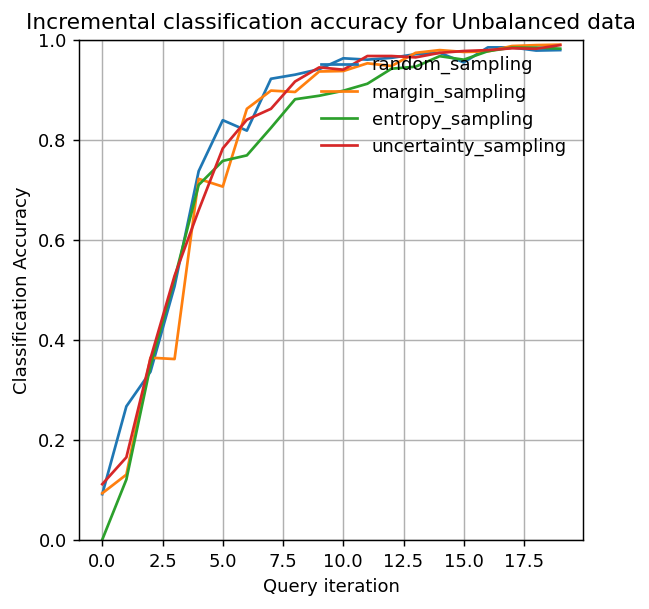

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=130)

ax.plot(scores_random_sampling, label='random_sampling')

ax.plot(scores_margin_sampling, label='margin_sampling')

ax.plot(scores_entropy_sampling, label='entropy_sampling')

ax.plot(scores_uncertainty_sampling, label='uncertainty_sampling')

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('Incremental classification accuracy for Unbalanced data')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')
leg = ax.legend(loc='upper right', frameon=False);
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# evaluate the performance of the active learning models on the test set
y_pred_entropy = learner_entropy_sampling.predict(x)
acc_entropy = accuracy_score(y, y_pred_entropy)

y_pred_uncertainty = learner_uncertainty_sampling.predict(x)
acc_uncertainty = accuracy_score(y, y_pred_uncertainty)

y_pred_margin = learner_margin_sampling.predict(x)
acc_margin = accuracy_score(y, y_pred_margin)

y_pred_random = learner_random_sampling.predict(x)
acc_random = accuracy_score(y, y_pred_random)

# print the accuracy score for each model
print("Accuracy score uncertainty sampling = ",acc_uncertainty)
print("Accuracy score margin sampling = ",acc_margin)
print("Accuracy score entropy sampling = ",acc_entropy)
print("Accuracy score random sampling = ",acc_random)

Accuracy score uncertainty sampling =  0.9890909090909091
Accuracy score margin sampling =  0.99
Accuracy score entropy sampling =  0.9836363636363636
Accuracy score random sampling =  0.9790909090909091


# **IRIS Data**

In [ ]:
iris = datasets.load_iris()

feature = iris.data
label = iris.target

In [ ]:
X_training=feature[0:50]
y_training=label[0:50]
X_pool=feature[50:-1]
y_pool=label[50:-1]

In [ ]:
learner_entropy_sampling = ActiveLearner(
estimator=RandomForestClassifier(n_estimators=100),
query_strategy=entropy_sampling,
X_training=X_training,
y_training=y_training,
)
print("entropy sampling")
score = 0
n_queries = 20
scores_entropy_sampling = []
for idx in range(n_queries):
    query_idx, query_instance = learner_entropy_sampling.query(X_pool)
    learner_entropy_sampling.teach (X=X_pool[query_idx] , y=y_pool[query_idx] )
    score = learner_entropy_sampling.score(feature, label)
    scores_entropy_sampling.append(score)
    print('Query no. %d' % (idx + 1),"The Score",score)

entropy sampling
Query no. 1 The Score 0.4066666666666667
Query no. 2 The Score 0.6
Query no. 3 The Score 0.6666666666666666
Query no. 4 The Score 0.6666666666666666
Query no. 5 The Score 0.6666666666666666
Query no. 6 The Score 0.6666666666666666
Query no. 7 The Score 0.6666666666666666
Query no. 8 The Score 0.6666666666666666
Query no. 9 The Score 0.6666666666666666
Query no. 10 The Score 0.6666666666666666
Query no. 11 The Score 0.6666666666666666
Query no. 12 The Score 0.6666666666666666
Query no. 13 The Score 0.6666666666666666
Query no. 14 The Score 0.6666666666666666
Query no. 15 The Score 0.6666666666666666
Query no. 16 The Score 0.6666666666666666
Query no. 17 The Score 0.68
Query no. 18 The Score 0.76
Query no. 19 The Score 0.8333333333333334
Query no. 20 The Score 0.86


In [ ]:
learner_uncertainty_sampling = ActiveLearner(
estimator=RandomForestClassifier(n_estimators=100),
query_strategy=uncertainty_sampling,
X_training=X_training,
y_training=y_training,
)
print("uncertainty sampling")
n_queries = 20
scores_uncertainty_sampling = []
for idx in range(n_queries):
    query_idx, query_instance = learner_uncertainty_sampling.query(X_pool)
    learner_uncertainty_sampling.teach (X=X_pool[query_idx] , y=y_pool[query_idx] )
    score = learner_uncertainty_sampling.score(feature, label)
    scores_uncertainty_sampling.append(score)
    print('Query no. %d' % (idx + 1),"The Score",score)

uncertainty sampling
Query no. 1 The Score 0.4066666666666667
Query no. 2 The Score 0.6133333333333333
Query no. 3 The Score 0.6666666666666666
Query no. 4 The Score 0.6666666666666666
Query no. 5 The Score 0.6666666666666666
Query no. 6 The Score 0.6666666666666666
Query no. 7 The Score 0.6666666666666666
Query no. 8 The Score 0.6666666666666666
Query no. 9 The Score 0.7
Query no. 10 The Score 0.7666666666666667
Query no. 11 The Score 0.8
Query no. 12 The Score 0.8933333333333333
Query no. 13 The Score 0.9333333333333333
Query no. 14 The Score 0.9533333333333334
Query no. 15 The Score 0.96
Query no. 16 The Score 0.9466666666666667
Query no. 17 The Score 0.9666666666666667
Query no. 18 The Score 0.9666666666666667
Query no. 19 The Score 0.9533333333333334
Query no. 20 The Score 0.9733333333333334


In [ ]:
learner_margin_sampling = ActiveLearner(
estimator=RandomForestClassifier(n_estimators=100),
query_strategy=margin_sampling,
X_training=X_training,
y_training=y_training,
)
print("margin sampling")
n_queries = 20
scores_margin_sampling = []
for idx in range(n_queries):
    query_idx, query_instance = learner_margin_sampling.query(X_pool)
    learner_margin_sampling.teach (X=X_pool[query_idx] , y=y_pool[query_idx] )
    score = learner_margin_sampling.score(feature, label)
    scores_margin_sampling.append(score)
    print('Query no. %d' % (idx + 1),"The Score",score)

margin sampling
Query no. 1 The Score 0.4066666666666667
Query no. 2 The Score 0.6133333333333333
Query no. 3 The Score 0.6666666666666666
Query no. 4 The Score 0.6666666666666666
Query no. 5 The Score 0.6666666666666666
Query no. 6 The Score 0.6666666666666666
Query no. 7 The Score 0.6666666666666666
Query no. 8 The Score 0.6666666666666666
Query no. 9 The Score 0.6666666666666666
Query no. 10 The Score 0.6666666666666666
Query no. 11 The Score 0.6666666666666666
Query no. 12 The Score 0.6666666666666666
Query no. 13 The Score 0.6666666666666666
Query no. 14 The Score 0.6666666666666666
Query no. 15 The Score 0.6666666666666666
Query no. 16 The Score 0.6666666666666666
Query no. 17 The Score 0.6666666666666666
Query no. 18 The Score 0.6666666666666666
Query no. 19 The Score 0.6666666666666666
Query no. 20 The Score 0.6866666666666666


In [ ]:
def random_sampling(classifier, X_pool):
    n_samples = len(X_pool)
    query_idx = np.random.choice(range(n_samples))
    return [query_idx], X_pool[query_idx]

In [ ]:
learner_random_sampling = ActiveLearner(
    estimator=RandomForestClassifier(n_estimators=100),
    query_strategy=random_sampling,
    X_training=X_training, y_training=y_training
)
print("random sampling")
n_queries = 20
scores_random_sampling = []
for idx in range(n_queries):
    query_idx, query_instance = learner_random_sampling.query(X_pool)
    learner_random_sampling.teach (X=X_pool[query_idx] , y=y_pool[query_idx] )
    score = learner_random_sampling.score(feature, label)
    scores_random_sampling.append(score)
    print('Query no. %d' % (idx + 1),"The Score",score)

random sampling
Query no. 1 The Score 0.4866666666666667
Query no. 2 The Score 0.6666666666666666
Query no. 3 The Score 0.8066666666666666
Query no. 4 The Score 0.7933333333333333
Query no. 5 The Score 0.74
Query no. 6 The Score 0.8466666666666667
Query no. 7 The Score 0.9466666666666667
Query no. 8 The Score 0.9666666666666667
Query no. 9 The Score 0.9733333333333334
Query no. 10 The Score 0.9466666666666667
Query no. 11 The Score 0.9733333333333334
Query no. 12 The Score 0.9733333333333334
Query no. 13 The Score 0.9533333333333334
Query no. 14 The Score 0.9733333333333334
Query no. 15 The Score 0.9533333333333334
Query no. 16 The Score 0.9466666666666667
Query no. 17 The Score 0.96
Query no. 18 The Score 0.9733333333333334
Query no. 19 The Score 0.9733333333333334
Query no. 20 The Score 0.94


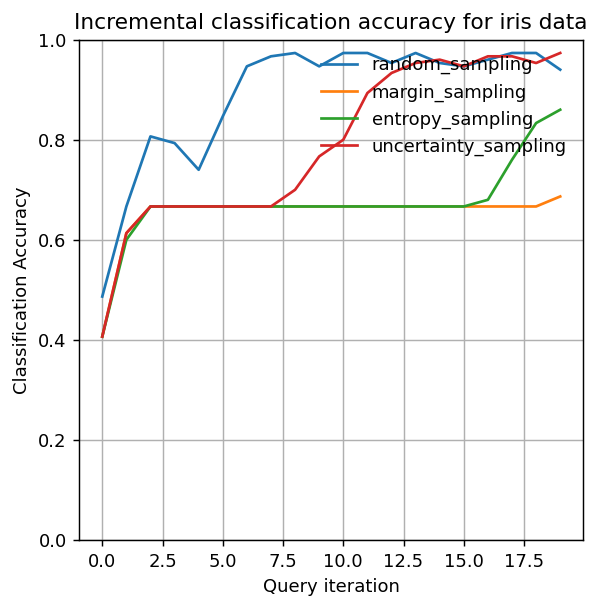

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=130)

ax.plot(scores_random_sampling, label='random_sampling')

ax.plot(scores_margin_sampling, label='margin_sampling')

ax.plot(scores_entropy_sampling, label='entropy_sampling')

ax.plot(scores_uncertainty_sampling, label='uncertainty_sampling')

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('Incremental classification accuracy for iris data')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')
leg = ax.legend(loc='upper right', frameon=False);
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# evaluate the performance of the active learning models on the test set
y_pred_entropy = learner_entropy_sampling.predict(feature)
acc_entropy = accuracy_score(label, y_pred_entropy)

y_pred_uncertainty = learner_uncertainty_sampling.predict(feature)
acc_uncertainty = accuracy_score(label, y_pred_uncertainty)

y_pred_margin = learner_margin_sampling.predict(feature)
acc_margin = accuracy_score(label, y_pred_margin)

y_pred_random = learner_random_sampling.predict(feature)
acc_random = accuracy_score(label, y_pred_random)

# print the accuracy score for each model
print("Accuracy score uncertainty sampling = ",acc_uncertainty)
print("Accuracy score margin sampling = ",acc_margin)
print("Accuracy score entropy sampling = ",acc_entropy)
print("Accuracy score random sampling = ",acc_random)

Accuracy score uncertainty sampling =  0.9733333333333334
Accuracy score margin sampling =  0.6866666666666666
Accuracy score entropy sampling =  0.86
Accuracy score random sampling =  0.94
